# 04 - Graphical Causal Models


## Thinking About Causality

Have you ever noticed how those cooks in YouTube videos are excellent at describing food? "Reduce the sauce until it reaches a velvety consistency". If you are just learning to cook, you have no idea what this even means. Just give me the time I should leave this thing on the stove! With causality, it's the same thing. Suppose you walk into a bar and hear folks discussing causality (probably a bar next to an economics department). In that case, you will hear them say how the confounding of income made it challenging to identify the immigration effect on that neighborhood, so they had to use an instrumental variable. And by now, you might not understand what they are talking about. But I'll fix at least some of this problem right now. 

Graphical models are the language of causality. They are not only what you use to talk with other brave and true causality aficionados but also something you use to make your own thoughts more transparent. 

As a starting point, let's take conditional independence of the potential outcomes, for example. This is one of the main assumptions that we require to be true when making causal inference:

$
(Y_0, Y_1) \perp T | X
$

Conditional Independence makes it possible for us to measure an effect on the outcome solely due to the treatment and not any other variable lurking around. The classic example of this is the effect of a medicine on an ill patient. If only highly sick patients get the drug, it might even look like giving the medication decreases the patients' health. That is because the effect of the severity is getting mixed up with the drug's effect. If we break down the patients into severe and not severe cases and analyse the drug impact in each subgroup, we will get a clearer picture of the actual effect. This breaking down the population by its features is what we call controlling for or conditioning on X. By conditioning on the severe cases, the treatment mechanism becomes as good as random. Patients within the severe group may or may not receive the drug only due to chance, not due to a high severity anymore, since all patients are the same on this dimension. And if treatment is randomly assigned within groups, the treatment becomes conditionally independent of the potential outcomes. 

Independence and conditional independence are central to causal inference. Yet, it can be pretty challenging to wrap our heads around them. But this can change if we use the correct language to describe this problem. Here is where **causal graphical models** come in. A causal graphical model is a way to represent how causality works in terms of what causes what. 

A graphical model looks like this

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

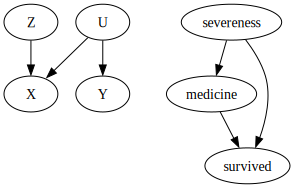

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

Each node is a random variable. We use arrows, or edges, to show if a variable causes another. In the first graphical model above, we are saying that Z causes X and that U causes X and Y. To give a more concrete example, we can translate our thoughts about the impact of the medicine on patient survival in the second graph above. Severeness causes both medicine and survival, and medicine also causes survival. As we will see, these causal graphical models language will help us make our thinking about causality clearer, as it clarifies our beliefs about how the world works. 

## Crash Course in Graphical Models

There are [whole semesters on graphical models](https://www.coursera.org/specializations/probabilistic-graphical-models). But, for our purpose, it is just (very) important that we understand what kind of independence and conditional independence assumptions a graphical model entails. As we shall see, independence flows through a graphical model as water flows through a stream. We can stop this flow or enable it, depending on how we treat the variables in it. To understand this, let's examine some common graphical structures and examples. They will be pretty straightforward, but they are sufficient building blocks to understand everything about independence and conditional independence on graphical models.

First, look at this very simple graph. A causes B, B causes C. Or X causes Y which causes Z.

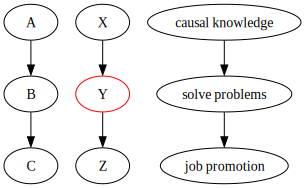

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

In the first graph, dependence flows in the direction of the arrows. Notice that dependence is symmetric, although it is a little less intuitive. To give a more concrete example, let's say that knowing about causal inference is the only way to solve business problems, and solving those problems is the only way to get a job promotion. So causal knowledge implies solving issues that cause a job promotion. We can say here that job promotion is dependent on causal knowledge. The greater the causal expertise, the greater your chances of getting a promotion. Also, the greater your chances of promotion, the greater your chance of having causal knowledge. Otherwise, it would be difficult to get a promotion. 

Now, let's say I condition on the intermediary variable. In this case, the dependence is blocked. So, X and Z are independent given Y. In the graph above, red indicates that Y is a conditioned variable. By the same token, in our example, if I know that you are good at solving problems, knowing that you know causal inference doesn't give any further information about your chances of getting a job promotion. In mathematical terms, $E[Promotion|Solve \ problems, Causal \ knowledge]=E[Promotion|Solve \ problems]$. The inverse is also true; once I know how good you are at solving problems, knowing about your job promotion status gives me no further information about how likely you are to know causal inference. 

As a general rule, the dependence flow in the direct path from A to C is blocked when we condition on an intermediary variable B. Or,

$A \not \perp C$

and

$
A \perp C | B
$

Now, let's consider a fork structure. The same variable causes two other variables down the graph. In this case, the dependence flows backward through the arrows, and we have a **backdoor path**. We can close the backdoor path and shut down dependence by conditioning on the common cause.

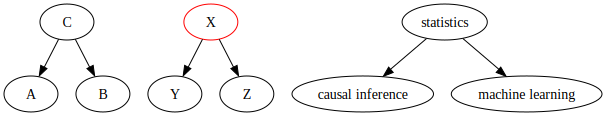

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")

g.edge("X", "Y")
g.edge("X", "Z")
g.node("X", "X", color="red")

g.edge("statistics", "causal inference")
g.edge("statistics", "machine learning")

g

For example, let's say your knowledge of statistics causes you to know more about causal inference and machine learning. If I don't know your level of statistical knowledge, then knowing that you are good at causal inference makes it more likely that you are also good at machine learning. That is because even if I don't know your level of statistical knowledge, I can infer it from your causal inference knowledge. If you are good at causal inference, you are probably good at statistics, making it more likely that you are good at machine learning. 

Now, if I condition on your knowledge about statistics, then how much you know about machine learning becomes independent of how much you know about causal inference. Knowing your level of statistics already gives me all the information I need to infer the level of your machine learning skills. You see, knowing your level of causal inference will provide no further information in this case. 

As a general rule, two variables that share a common cause are dependent, but independent when we condition on the common cause. Or

$A \not \perp  B$

and

$
A \perp B | C
$

The only structure that is missing is the collider. A collider is when two arrows collide on a single variable. We can say that in this case, both variables share a common effect. 

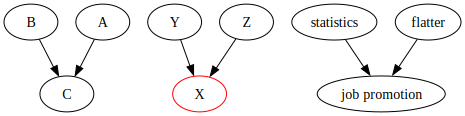

In [5]:
g = gr.Digraph()
g.edge("B", "C")
g.edge("A", "C")

g.edge("Y", "X")
g.edge("Z", "X")
g.node("X", "X", color="red")

g.edge("statistics", "job promotion")
g.edge("flatter", "job promotion")

g

For example, consider that there are two ways to get a job promotion. You can either be good at statistics or flatter your boss. If I don't condition on your job promotion, that is, I know nothing if you will or won't get it, then your level of statistics and flattering are independent. In other words, knowing how good you are at statistics tells me nothing about how good you are at flattering your boss. On the other hand, if you did get a job promotion, suddenly, knowing your level of statistics tells me about your flattering level. If you are bad at statistics and did get a promotion, you will likely know how to flatter. Otherwise, you wouldn't get a promotion. Conversely, if you are bad at flattering, it must be the case that you are good at statistics. This phenomenon is sometimes called **explaining away**, because one cause already explains the effect, making the other cause less likely.

As a general rule, conditioning on a collider opens the dependence path. Not conditioning on it leaves it closed. Or

$A \perp B$

and

$
A \not \perp B | C
$

Knowing the three structures, we can derive an even more general rule. A path is blocked if and only if:
1. It contains a non collider that has been conditioned on
2. It contains a collider that has not been conditioned on and has no descendants that have been conditioned on.

Here is a cheat sheet about how dependence flows in a graph. I've taken from a [Stanford presentation](http://ai.stanford.edu/~paskin/gm-short-course/lec2.pdf) by Mark Paskin.  The arrows with lines at their tips signify independence, and the arrows without lines at their tips signify dependence.

![img](data/img/graph-flow.png)

As a final example, try to figure out some independence and dependence relationship in the following causal graph.
1. Is $D \perp C$?
2. Is $D \perp C| A $ ?
3. Is $D \perp C| G $ ?
4. Is $A \perp F $ ?
5. Is $A \perp F|E $ ?
6. Is $A \perp F|E,C $ ?

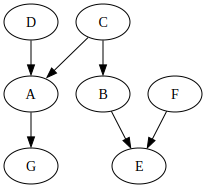

In [6]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

**Answers**:
1. $D \perp C$. It contains a collider that it has **not** been conditioned on.
2. $D \not\perp C| A $. It contains a collider that it has  been conditioned on.
3. $D \not\perp C| G $. It contains the descendent of a collider that has  been conditioned on. You can see G as some kind of proxy for A here.
4. $A \perp F $. It contains a collider, B->E<-F, that it has **not** been conditioned on.
5. $A \not\perp F|E $. It contains a collider, B->E<-F, that it has been conditioned on.
6. $A \perp F|E, C $. It contains a collider, B->E<-F, that it has been conditioned on, but it contains a non collider that has been conditioned on. Conditioning on E opens the path, but conditioning on C closes it again.

Knowing about causal graphical models enables us to understand the problems that arise in causal inference. As we've seen, the problem always boils down to bias. 

$
E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}
$

Graphical models allow us to diagnose which bias we are dealing with and what are the tools we need to correct for them.

## Confounding Bias

![img](./data/img/causal-graph/both_crap.png)

The first significant cause of bias is confounding. It happens when the treatment and the outcome share a common cause. For example, let's say that the treatment is education, and the outcome is income. It is hard to know the causal effect of education on wages because both share a common cause: intelligence. So we could argue that more educated people earn more money simply because they are more intelligent, not because they have more education. We need to close all backdoor paths between the treatment and the outcome to identify the causal effect. If we do so, the only effect that will be left is the direct effect T->Y. In our example, if we control for intelligence, that is, we compare people with the same level of intellect but different levels of education, the difference in the outcome will be only due to the difference in schooling since intelligence will be the same for everyone. To fix confounding bias, we need to control all common causes of the treatment and the outcome.

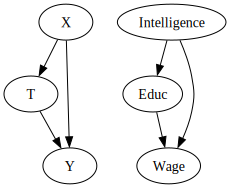

In [7]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g

Unfortunately, it is not always possible to control all common causes. Sometimes, there are unknown causes or known causes that we can't measure. The case of intelligence is one of the latter. Despite all the effort, scientists haven't yet figured out how to measure intelligence well. I'll use U to denote unmeasured variables here. Now, assume for a moment that intelligence can't affect your education directly. It affects how well you do on the SATs, but the SATs determine your level of schooling since it opens the possibility of a good college. Even if we can't control for the unmeasurable intelligence, we can control for SAT and close that backdoor path.

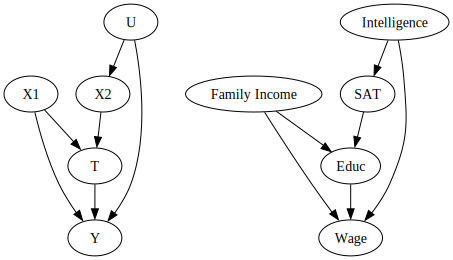

In [8]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

In the following graph, conditioning on X1 and X2, or SAT and family income, is sufficient to close all backdoor paths between the treatment and the outcome. In other words, $(Y_0, Y_1) \perp T | X1, X2$. So even if we can't measure all common causes, we can still attain conditional independence if we control for measurable variables that mediate the effect of the unmeasured on the treatment. One quick note, we also have $(Y_0, Y_1) \perp T | X1, U$, but since we can't observe U, we can't condition on it. 

But what if that is not the case? What if the unmeasured variable causes the treatment and the outcome directly? In the following example, intelligence causes education and income now. So there is confounding in the relationship between the treatment education and the outcome wage. In this case, we can't control the confounder because it is unmeasurable. However, we have other measured variables that can act as a proxy for the confounder. Those variables are not in the backdoor path, but controlling for them will help lower the bias (but it won't eliminate it). Those variables are sometimes referred to as surrogate confounders.

In our example, we can't measure intelligence, but we can measure some of its causes, like the father's and mother's education, and some of its effects, like IQ or SAT score. Controlling for those surrogate variables is not sufficient to eliminate bias, but it helps.

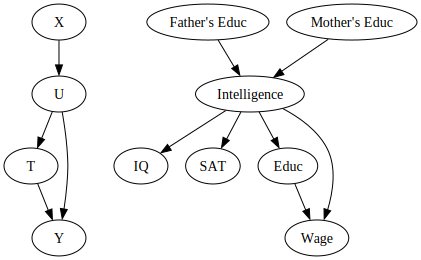

In [9]:
g = gr.Digraph()
g.edge("X", "U")
g.edge("U", "T")
g.edge("T", "Y")
g.edge("U", "Y")

g.edge("Intelligence", "IQ")
g.edge("Intelligence", "SAT")
g.edge("Father's Educ", "Intelligence")
g.edge("Mother's Educ", "Intelligence")

g.edge("Intelligence", "Educ")
g.edge("Educ", "Wage")
g.edge("Intelligence", "Wage")

g

## Selection Bias

You might think it is a good idea to add everything you can measure to your model just to ensure you don't have confounding bias. Well, think again.

![image.png](./data/img/causal-graph/selection_bias.png)

The second significant source of bias is what we will call selection bias. Here, I think the distinction between it and confounding bias is constructive, so I'll stick to it. If confounding bias happens when we don't control for a common cause, selection bias is more related to effects. One word of caution here, economists tend to refer to all sorts of biases as selection bias. 

Often, selection bias arises when we control for more variables than we should. It might be the case that the treatment and the potential outcome are marginally independent but become dependent once we condition on a collider. 

Imagine that with the help of some miracle, you can finally randomize education to measure its effect on wages. But just to be sure you won't have confounding, you control for many variables. Among them, you control for investments. But investment is not a common cause of education and wage. Instead, it is a consequence of both. More educated people both earn more and invest more. Also, those who make more invest more. Since investment is a collider, by conditioning on it, you are opening a second path between the treatment and the outcome, which will make it harder to measure the direct effect. One way to think about this is that by controlling investments, you look at small groups of the population where investment is the same and then find the effect of education on those groups. But by doing so, you are also indirectly and inadvertently not allowing wages to change much. As a result, you won't be able to see how education changes wages because you are not allowing wages to change as they should. 

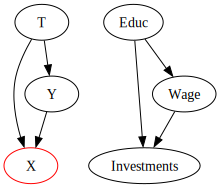

In [10]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.node("X", "X", color="red")

g.edge("Educ", "Investments")
g.edge("Educ", "Wage")
g.edge("Wage", "Investments")

g

Imagine that investments and education take only 2 values to demonstrate why this is the case. Whether people invest or not. They are either educated or not. Initially, when we don't control for investments, the bias term is zero: $E[Y_0|T=1] - E[Y_0|T=0] = 0$ because the education was randomised. This means that the wage people would have if they didn't receive education $Wage_0$ is the same if they do or don't receive the education treatment. But what happens if we condition on investments?

Looking at those that invest, we probably have the case that $E[Y_0|T=0, I=1] > E[Y_0|T=1, I=1]$. In words, among those that invest, those that manage to do so even without education are more independent of education to achieve high earnings. For this reason, the wage those people have, $Wage_0|T=0$, is probably higher than the wage the educated group would have if they didn't have education, $Wage_0|T=1$. A similar reasoning can be applied to those that don't invest, where we also probably have $E[Y_0|T=0, I=0] > E[Y_0|T=1, I=0]$. Those who don't invest even with education probably would have a lower wage, had they not got the education, than those who didn't invest but didn't have an education. 

To use a purely graphical argument, if someone invests, knowing that they have high education explains away the second cause, which is wage. Conditioned on investing, higher education is associated with low wages and we have a negative bias $E[Y_0|T=0, I=i] > E[Y_0|T=1, I=i]$. 

As a side note, all of this we've discussed is true if we condition on any descendent of a common effect.

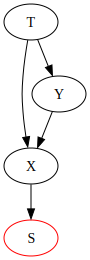

In [11]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("Y", "X")
g.edge("X", "S")
g.node("S", "S", color="red")
g

A similar thing happens when we condition on a mediator of the treatment. A mediator is a variable between the treatment and the outcome. It, well, mediates the causal effect. For example, suppose again you can randomize education. But, just to be sure, you decide to control whether or not the person had a white-collar job. Once again, this conditioning biasses the causal effect estimation. This time, not because it opens a front door path with a collider, but because it closes one of the channels through which the treatment operates. In our example, getting a white-collar job is one way more education leads to higher pay. By controlling it, we close this channel and leave open only the direct effect of education on wages.

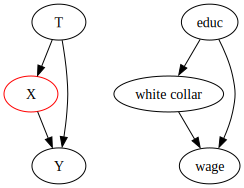

In [12]:
g = gr.Digraph()
g.edge("T", "X")
g.edge("T", "Y")
g.edge("X", "Y")
g.node("X", "X", color="red")

g.edge("educ", "white collar")
g.edge("educ", "wage")
g.edge("white collar", "wage")

g

To give a potential outcome argument, we know that, due to randomisation, the bias is zero $E[Y_0|T=0] - E[Y_0|T=1] = 0$. However, if we condition on the white-collar individuals, we have that $E[Y_0|T=0, WC=1] > E[Y_0|T=1, WC=1]$. That is because those who manage to get a white-collar job even without education are probably more hard-working than those who require the help of education to get the same job. With the same reasoning, $E[Y_0|T=0, WC=0] > E[Y_0|T=1, WC=0]$ because those that didn't get a white-collar job even with an education are probably less hard-working than those that didn't, but also didn't have any education. 

In our case, conditioning on the mediator induces a negative bias. It makes the effect of education seem lower than it actually is. This is the case because the causal effect is positive. If the effect were negative, conditioning on a mediator would have a positive bias. In all cases, this sort of conditioning makes the effect look weaker than it is. 

To put it more prosaic way, suppose that you have to choose between two candidates for a job at your company. Both have equally impressive professional achievements, but one does not have a higher education degree. Which one should you choose? Of course, you should go with the one without the higher education because he managed to achieve the same things as the other one but had the odds stacked against him.

![image.png](./data/img/causal-graph/three_bias.png)

## Key Ideas

We've studied graphical models as a language to better understand and express causality ideas. We did a quick summary of the rules of conditional independence on a graph. This helped us then explore three structures that can lead to bias.

The first was confounding, which happens when treatment and outcome have a common cause that we don't account for or control for. The second is selection bias due to conditioning on a common effect. The third structure is also a form of selection bias, this time due to excessive controlling of mediator variables. This excessive controlling could lead to bias even if the treatment was randomly assigned. Selection bias can often be fixed by simply doing nothing, which is why it is dangerous. Since we are biased toward action, we tend to see ideas that control things as clever when they can be doing more harm than good. 

## References

I like to think of this entire book as a tribute to Joshua Angrist, Alberto Abadie and Christopher Walters for their amazing Econometrics class. Most of the ideas here are taken from their classes at the American Economic Association. Watching them is what is keeping me sane during this tough year of 2020.
* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

I'll also like to reference the amazing books from Angrist. They have shown me that Econometrics, or 'Metrics as they call it, is not only extremely useful but also profoundly fun.

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

My final reference is Miguel Hernan and Jamie Robins' book. It has been my trustworthy companion in the most thorny causal questions I had to answer.

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

![img](./data/img/poetry.png)

## Contribute

Causal Inference for the Brave and True is an open-source material on causal inference, the statistics of science. Its goal is to be accessible monetarily and intellectually. It uses only free software based on Python.
If you found this book valuable and want to support it, please go to [Patreon](https://www.patreon.com/causal_inference_for_the_brave_and_true). If you are not ready to contribute financially, you can also help by fixing typos, suggesting edits, or giving feedback on passages you didn't understand. Go to the book's repository and [open an issue](https://github.com/matheusfacure/python-causality-handbook/issues). Finally, if you liked this content, please share it with others who might find it helpful and give it a [star on GitHub](https://github.com/matheusfacure/python-causality-handbook/stargazers).